In [1]:
! pip install keras


In [2]:
! pip install huggingface_hub

     |████████████████████████████████| 77 kB 3.3 MB/s 


In [3]:
import numpy as np # array manipulation
from huggingface_hub import from_pretrained_keras # download the model
import keras # deep learning
from PIL import Image # Image processing


In [4]:
model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)


config.json not found in HuggingFace Hub


Downloading:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.56M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.19M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/437M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/219k [00:00<?, ?B/s]

In [ ]:
model

In [5]:
low_light_img = Image.open('/content/c6310e6658b6b0cf282056029f9768b7.jpg').convert('RGB')

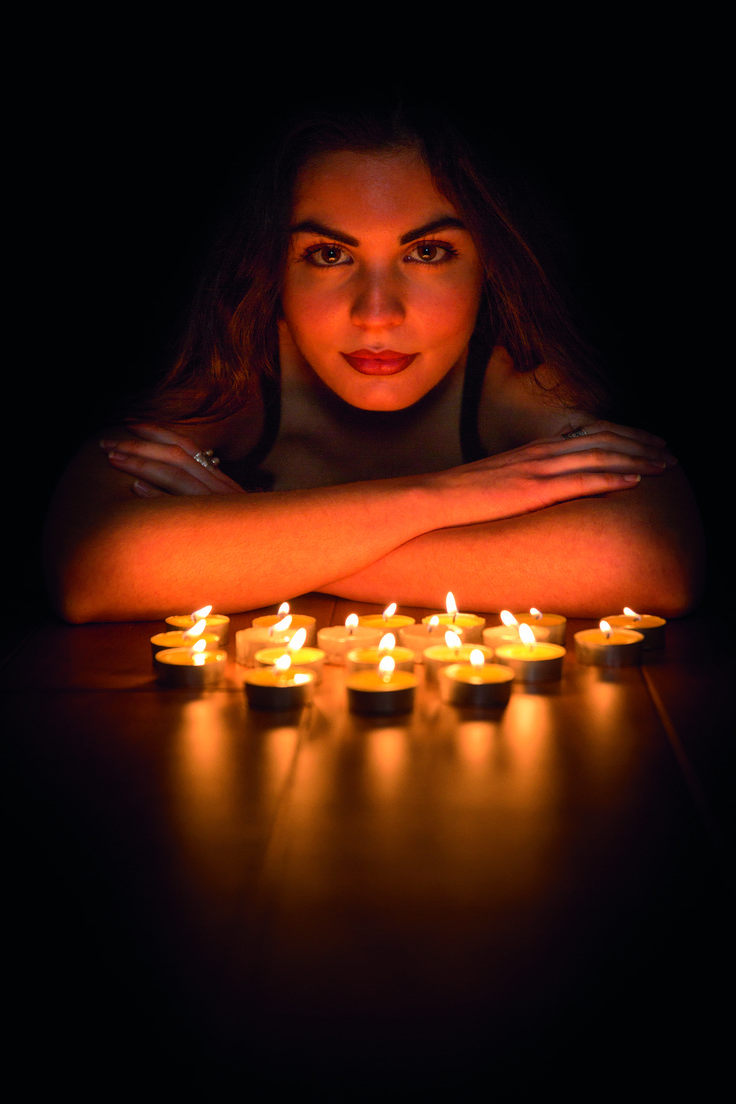

In [6]:
low_light_img

In [7]:
low_light_img = low_light_img.resize((256,256),Image.NEAREST)


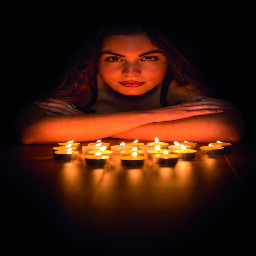

In [8]:
low_light_img


In [9]:
image = keras.preprocessing.image.img_to_array(low_light_img)

In [10]:
image.shape

(256, 256, 3)

In [11]:


image = image.astype('float32') / 255.0

In [12]:
image.shape

(256, 256, 3)

In [13]:
image = np.expand_dims(image, axis = 0)

In [14]:
image.shape

(1, 256, 256, 3)

In [15]:
output = model.predict(image)

In [16]:
output_image = output[0] * 255.0


In [17]:
output_image.shape

(256, 256, 3)

In [18]:
output_image = output_image.clip(0,255)


In [19]:
output_image.shape

(256, 256, 3)

In [20]:
output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))

In [21]:
output_image = np.uint32(output_image)

In [28]:
help(k.save)

Help on method save in module PIL.Image:

save(fp, format=None, **params) method of PIL.Image.Image instance
    Saves this image under the given filename.  If no format is
    specified, the format to use is determined from the filename
    extension, if possible.
    
    Keyword options can be used to provide additional instructions
    to the writer. If a writer doesn't recognise an option, it is
    silently ignored. The available options are described in the
    :doc:`image format documentation
    <../handbook/image-file-formats>` for each writer.
    
    You can use a file object instead of a filename. In this case,
    you must always specify the format. The file object must
    implement the ``seek``, ``tell``, and ``write``
    methods, and be opened in binary mode.
    
    :param fp: A filename (string), pathlib.Path object or file object.
    :param format: Optional format override.  If omitted, the
       format to use is determined from the filename extension.
       I

In [26]:
k=Image.fromarray(output_image.astype('uint8'),'RGB')

In [30]:
k.save("/content/test_image.jpg",format="JPEG")

In [23]:
output_image

array([[[38, 38, 38],
        [48, 50, 50],
        [44, 53, 51],
        ...,
        [46, 55, 49],
        [47, 49, 47],
        [34, 35, 39]],

       [[45, 38, 48],
        [61, 50, 54],
        [52, 51, 46],
        ...,
        [45, 51, 41],
        [50, 53, 50],
        [39, 45, 47]],

       [[43, 33, 44],
        [59, 45, 46],
        [46, 41, 37],
        ...,
        [39, 39, 36],
        [45, 41, 49],
        [38, 44, 47]],

       ...,

       [[42, 40, 42],
        [59, 51, 43],
        [51, 45, 37],
        ...,
        [45, 40, 33],
        [46, 44, 45],
        [40, 42, 48]],

       [[43, 39, 45],
        [64, 56, 50],
        [59, 53, 46],
        ...,
        [57, 47, 39],
        [54, 51, 49],
        [42, 46, 49]],

       [[35, 30, 36],
        [51, 47, 41],
        [53, 44, 39],
        ...,
        [48, 45, 33],
        [42, 45, 41],
        [35, 40, 31]]], dtype=uint32)

In [24]:
from google.colab import files
import pandas as pd

In [25]:
output_image to_jpg(testcase.jpg)

SyntaxError: ignored